### Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

# KM2 : Illustrative synthetic dataset, determination of k, description of clusters
Cluster the balls data using kmeans

Try to choose k based on data visualization

Try to choose the number of clusters based on finding the elbow of the loss function dependent on k

Output the cluster centers

Assess how many samples are contained in each cluster.


#### Loading the dataset

In [3]:
balls_dataset = pd.read_csv('dataBalls.csv')
balls_dataset.head()

,x,y
0,-0.202969,-1.520712
1,-0.545900,-2.165577
2,0.347952,-2.267513
3,-0.039389,-2.429920
4,-0.130040,-2.202356


#### Scatterplot of dataset

Text(0, 0.5, 'y')

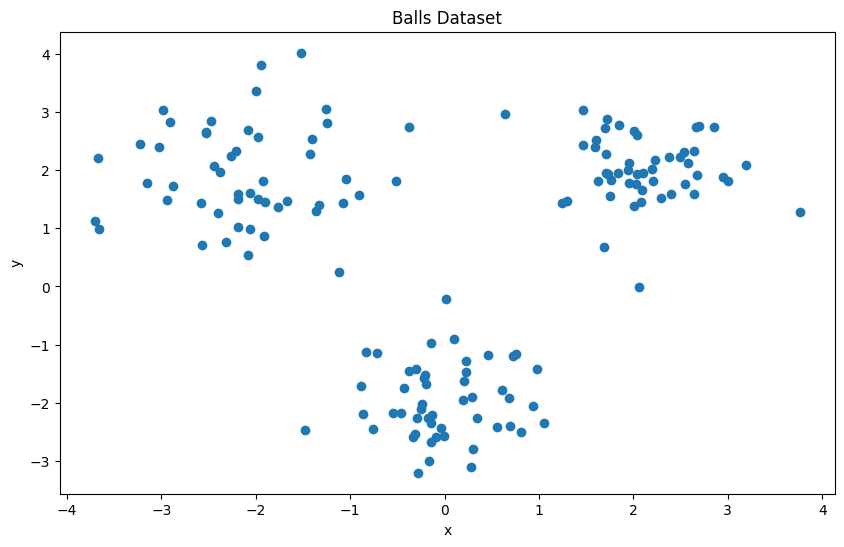

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(balls_dataset['x'], balls_dataset['y'])
plt.title('Balls Dataset')
plt.xlabel('x')
plt.ylabel('y')

We can see that the dataset consist of "3 balls", and it should be easy to cluster them

#### Try to choose the number of clusters based on finding the elbow of the loss function dependent on k

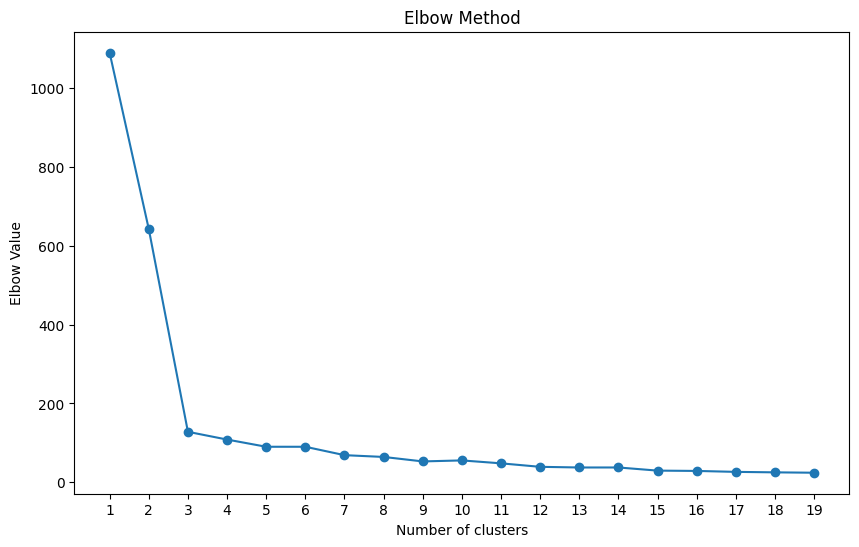

In [39]:
def plot_elbow_method(dataset):
    elbow_values = []
    for i in range(1, 20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(dataset[['x', 'y']])
        elbow_values.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 20), elbow_values, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.xticks(range(1, 20))
    plt.ylabel('Elbow Value')
    plt.show()

plot_elbow_method(balls_dataset)

From elbow method we can see, thatthe best value of k would be 3

**k=3**

#### Cluster centers and cluster amount

In [ ]:
class KMeanClassificator:
    def __init__(self, dataset, n_clusters):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters)

    def fit(self):
        self.kmeans.fit(self.dataset[['x', 'y']])
        self.dataset['cluster'] = self.kmeans.labels_

    def get_centroids(self):
        return self.kmeans.cluster_centers_

    def calculate_cluster_amount(self):
        return self.dataset['cluster'].value_counts()

    def plot(self, title):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='x', y='y', hue='cluster', data=self.dataset)
        plt.scatter(self.get_centroids()[:, 0], self.get_centroids()[:, 1], s=25, c='red', label='Centroids')
        plt.title(f'{title} Dataset')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()



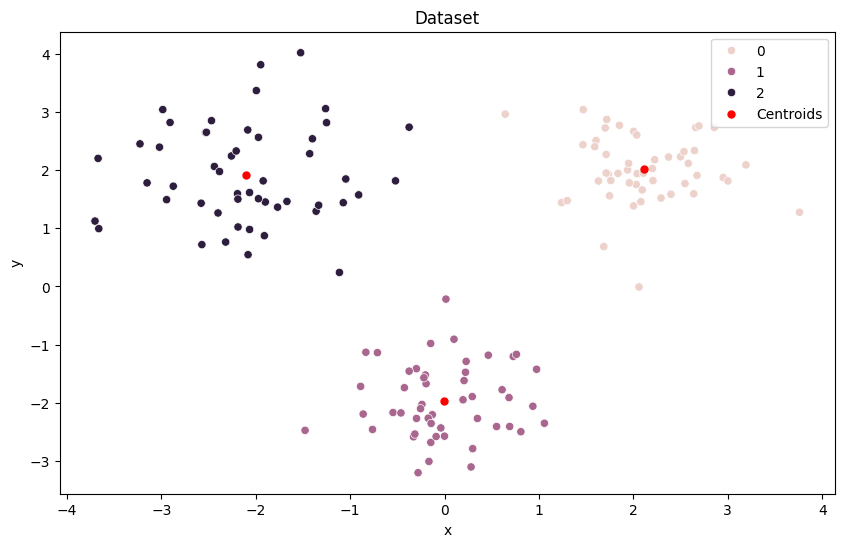

cluster
1    50
0    50
2    50
Name: count, dtype: int64


In [46]:
balls_KMean = KMeanClassificator(balls_dataset, 3)
balls_KMean.fit()
balls_KMean.plot()
print(balls_KMean.calculate_cluster_amount())

# KM3 : Illustrative synthetic datasets, determination of k, description of clusters

(a) Cluster the two Moons data using kmeans. Choose k both with the generic elbow method and by visualization. Output the cluster centers. Is the result good?

(b) Cluster the circles data using kmeans. Choose k both with the generic elbow method and by visualization. Output the cluster centers. Is the result good?

#### Two Moons dataset

In [37]:
# loading dataset
two_moons_dataset = pd.read_csv('twoMoons.csv')
two_moons_dataset.head()

,x,y
0,-5.1226,0.7478
1,-4.6440,1.9530
2,5.8056,-2.0327
3,-3.7811,2.5167
4,4.4117,-2.6287


#### Scatterplot 

Text(0, 0.5, 'y')

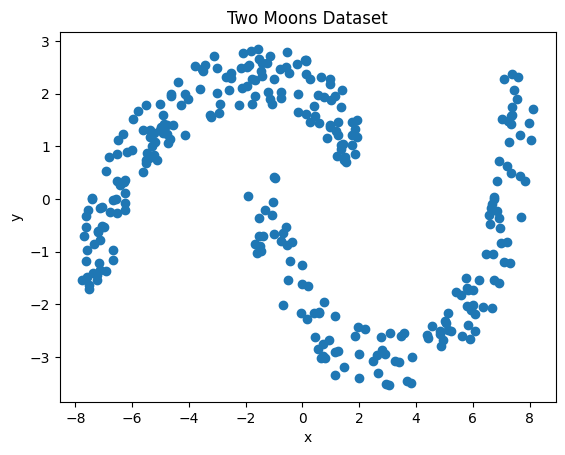

In [41]:
plt.scatter(two_moons_dataset['x'], two_moons_dataset['y'])
plt.title('Two Moons Dataset')
plt.xlabel('x')
plt.ylabel('y')


I would say we can see 2 clusters, and we should split it that way

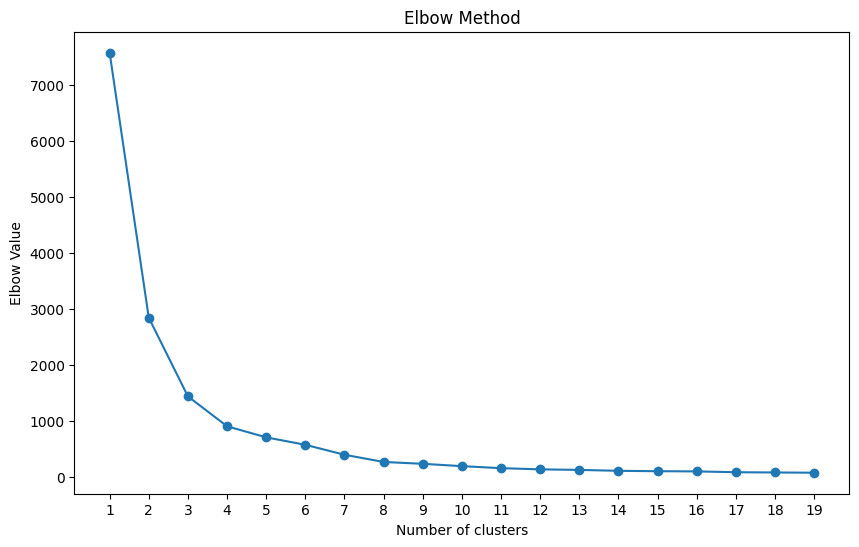

In [40]:
plot_elbow_method(two_moons_dataset)

From elbow method we can see the elbow on k=3, maybe k=4

#### Clsutering with k=3

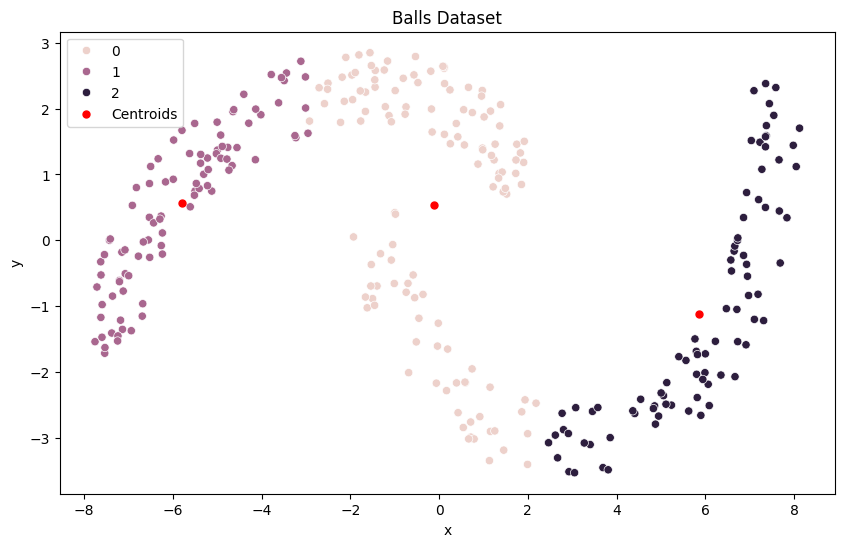

In [42]:
two_moons_KMean_3 = KMeanClassificator(two_moons_dataset, 3)
two_moons_KMean_3.fit()
two_moons_KMean_3.plot()

#### Clustering with k=4

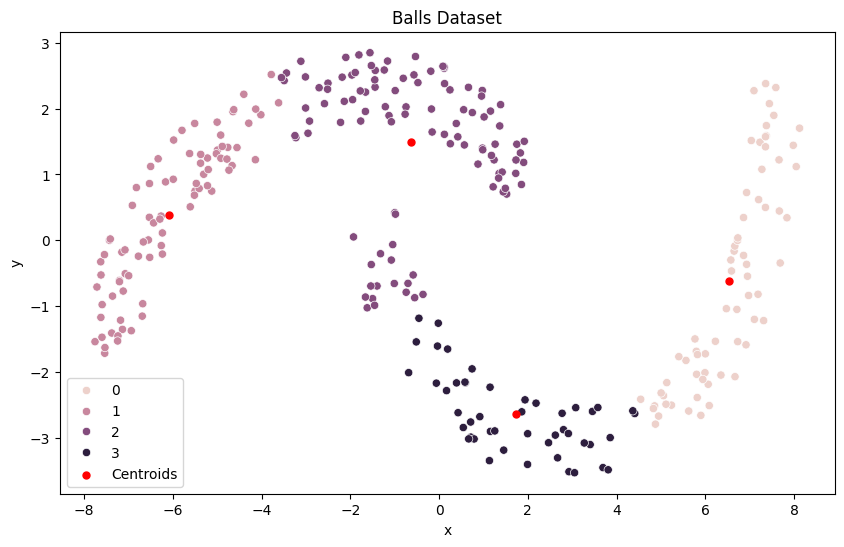

In [43]:
two_moons_KMean_4 = KMeanClassificator(two_moons_dataset, 4)
two_moons_KMean_4.fit()
two_moons_KMean_4.plot()

#### Clustering with k=2

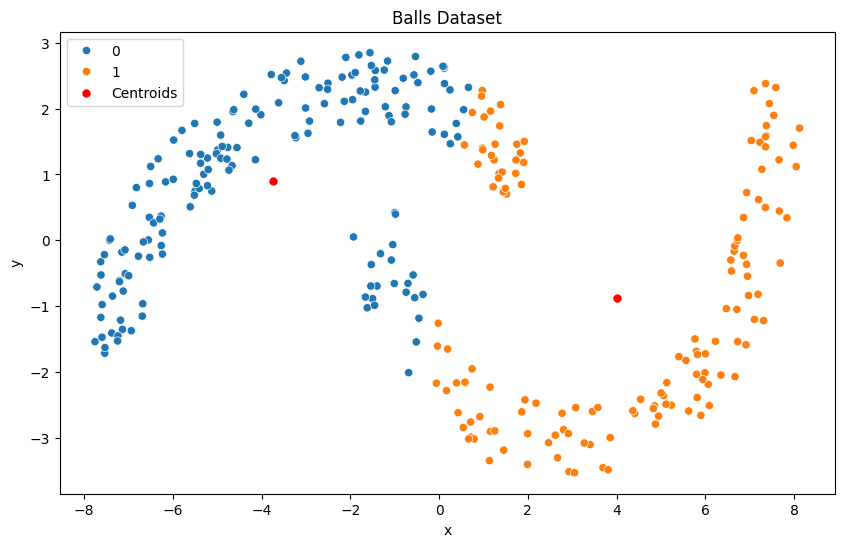

In [44]:
two_moons_KMean_2 = KMeanClassificator(two_moons_dataset, 2)
two_moons_KMean_2.fit()
two_moons_KMean_2.plot()